In [71]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import pathlib

import re

import hdf5plugin
import h5py

In [62]:
OUTPUT_PATH = pathlib.Path('/mnt_blpc3/datax/scratch/andresl/starlink-pipeline-runs/sample-run')
assert OUTPUT_PATH.is_dir()

2025-07-17 10:58:51,278 | DEBUG | rfi_pipeline.process (blc07_guppi_60055_23754_Arp220_0134.rawspec.0000.h5) (1596800): Done! Took 21.1s

In [63]:
file_times = []
pattern = r'rfi_pipeline\.process \((.+?)\) \(\d+\): Finished file! Took ([\d\.e]+)s'
with open(OUTPUT_PATH / 'logs' / 'all_logs.log', 'r') as file:
    for line in file:
        m = re.search(pattern, line)
        if m:
            file_times.append({'file': m.group(1), 'time': float(m.group(2))})
file_times = pd.DataFrame(file_times).set_index('file')

In [64]:
file_blocks = []
pattern = r'rfi_pipeline\.process \((.+?)\) \(\d+\): Found (\d+) interesting blocks\.'
with open(OUTPUT_PATH / 'logs' / 'all_logs.log', 'r') as file:
    for line in file:
        m = re.search(pattern, line)
        if m:
            file_blocks.append({'file': m.group(1), 'block count': int(m.group(2))})
file_blocks = pd.DataFrame(file_blocks).set_index('file')

In [65]:
run_info = file_times.join(file_blocks)

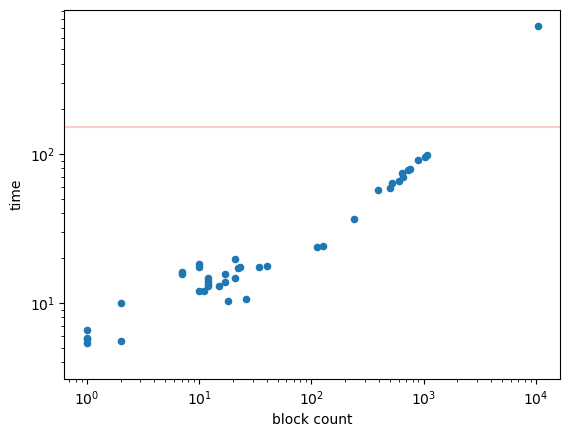

In [66]:
ax = run_info.plot.scatter(x='block count', y='time', logx=True, logy=True)
ax.axhline(2.5 * 60, color='red', alpha=0.2)

In [67]:
full_names = {}
for name in run_info.index:
    pattern = r'rfi_pipeline\.process \(' + re.escape(name) + r'\) \(\d+\): Opened ([\w\/]+' + re.escape(name) + r')'
    with open(OUTPUT_PATH / 'logs' / 'all_logs.log', 'r') as file:
        for line in file:
            m = re.search(pattern, line)
            if m:
                full_names[name] = m.group(1)
full_names = pd.Series(full_names)
full_names

blc03_guppi_58350_19939_HIP92549_0106.gpuspec.0000.h5        /datag/pipeline/AGBT18B_999_08/blp03/blc03_gup...
blc53_guppi_60355_20550_TIC301991463_0104.rawspec.0000.h5    /datag/pipeline/AGBT23B_999_41/blc53_blp13/blc...
blc53_guppi_60268_71862_HIP57483_0107.rawspec.0000.h5        /datag/pipeline/AGBT23B_999_01/blc53_blp13/blc...
blc31_guppi_58632_33062_HIP78286_0074.gpuspec.0000.h5        /datag/pipeline/AGBT19A_999_51/blp01/blc31_gup...
blc42_guppi_58590_58549_HIP79822_0037.gpuspec.0000.h5        /datag/pipeline/AGBT19A_999_30/blp02/blc42_gup...
blc21_guppi_59235_59876_HIP105795_0103.rawspec.0000.h5       /datag/pipeline/AGBT20B_996_05/blc21_blp01/blc...
blc01_guppi_59006_73742_3C295_0119.rawspec.0000.h5           /datag/pipeline/AGBT20A_999_40/blc01_blp01/blc...
blc17_guppi_60419_21768_TIC339207264_0111.rawspec.0000.h5    /datag/pipeline/AGBT24A_999_22/blc17_blp07/blc...
blc21_guppi_60422_74055_TIC63586213_0141.rawspec.0000.h5     /datag/pipeline/AGBT24A_999_24/blc21_blp11/blc...
b

In [68]:
run_info['full name'] = full_names

In [69]:
slow_file = run_info.sort_values('time', inplace=False).iloc[-1]['full name']

In [79]:
slow_file

'/datag/pipeline/AGBT20B_999_42/blc00_blp00/blc00_guppi_59181_57258_HIP60299_0041.rawspec.0000.h5'

In [72]:
f = h5py.File(slow_file)

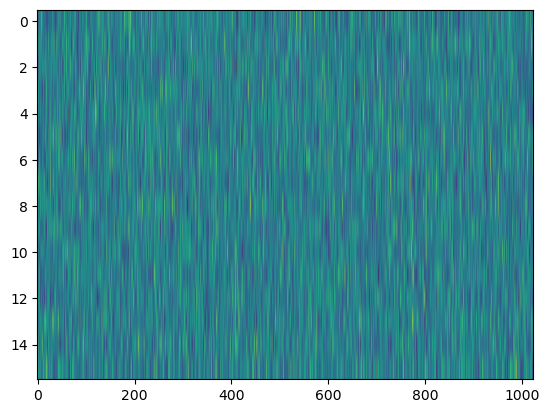

In [78]:
l_index = 2**20 + 2**19 + 1
r_index = l_index + 1024

data = f['data'][:, 0, l_index:r_index]

plt.imshow(data, aspect='auto')

In [81]:
slow_batch = pd.read_csv('/mnt_blpc3/datax/scratch/andresl/starlink-pipeline-runs/sample-run/batches/batch_021.csv')
slow_batch

,frequency_index,frequency,kurtosis,snr,width,flags,source file
0,94720,12376.197675,50.636480,2.617035,0.000031,NaN,/datag/pipeline/AGBT24B_999_21/blc00_blp00/blc...
1,95232,12376.197677,51.366158,2.630362,0.000029,NaN,/datag/pipeline/AGBT24B_999_21/blc00_blp00/blc...
2,202240,12375.898256,127.078840,54.003659,0.000026,NaN,/datag/pipeline/AGBT24B_999_21/blc00_blp00/blc...
3,202752,12375.898259,127.072360,54.839553,0.000025,NaN,/datag/pipeline/AGBT24B_999_21/blc00_blp00/blc...
4,203776,12375.893158,17.055845,4.150442,0.000135,NaN,/datag/pipeline/AGBT24B_999_21/blc00_blp00/blc...
...,...,...,...,...,...,...,...
35811,64056320,12197.492158,962.587500,6.492144,0.000006,NaN,/datag/pipeline/AGBT24B_999_21/blc00_blp00/blc...
35812,64584192,12196.017045,219.694370,3.512498,0.000006,NaN,/datag/pipeline/AGBT24B_999_21/blc00_blp00/blc...
35813,64584704,12196.017046,215.612870,3.510047,0.000006,NaN,/datag/pipeline/AGBT24B_999_21/blc00_blp00/blc...
35814,64771584,12195.492663,1463.546000,12.676626,0.000007,NaN,/datag/pipeline/AGBT24B_999_21/blc00_blp00/blc...
